# Let's try to read in our FRAP data and generate some plots

Showing the prebleach frames

In [1]:
from os import listdir

import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt

from scipy import optimize
from scipy import stats

In [2]:
#Define the folder containing your file of interest,
#Currently this is './' the current folder
Exp002_folder = "C:/Users/David Brown/Documents/Huang Lab/EML4-ALK_FRAP_Exp002_Results/"
Exp003_folder = "C:/Users/David Brown/Documents/Huang Lab/EML4-ALK_FRAP_Exp003_Results/"
Exp004_folder = "C:/Users/David Brown/Documents/Huang Lab/EML4-ALK_FRAP_Exp004_Results/"

In [3]:
Exp002_files = listdir(Exp002_folder)
# Exp002_files

In [4]:
Exp003_files = listdir(Exp003_folder)
# Exp003_files

In [5]:
Exp004_files = listdir(Exp004_folder)
# Exp004_files

We need a function to generate a FRAP plot

In [6]:
def getdata(input_folder, file_index):
    
    files = listdir(input_folder)
    file  = files[file_index]
    
    df = pd.read_csv(input_folder+file)

    names = list(df.columns)
    names[0]='Frame'
    names

    df.columns = names
    
    return df, file

In [7]:
#Read all the data into a list of dataframes.

#Or one big dataframe (easier to save)

In [8]:
df_list = list()
file_list = list()

for input_folder in [Exp002_folder, Exp003_folder, Exp004_folder]:
    files = listdir(input_folder)
    
    for file_index in range(len(files)):
        
#         print('Reading ', file_index, 'from ', input_folder)
        
        df, file = getdata(input_folder, file_index)
        
        df_list.append(df)
        file_list.append(file)

In [9]:
file_list

['EML4-ALKv1_FRAP_10_Results.csv',
 'EML4-ALKv1_FRAP_11_Results.csv',
 'EML4-ALKv1_FRAP_12_Results.csv',
 'EML4-ALKv1_FRAP_13_Results.csv',
 'EML4-ALKv1_FRAP_14_Results.csv',
 'EML4-ALKv1_FRAP_16_Results.csv',
 'EML4-ALKv1_FRAP_1_Results.csv',
 'EML4-ALKv1_FRAP_2_Results.csv',
 'EML4-ALKv1_FRAP_3_Results.csv',
 'EML4-ALKv1_FRAP_4_Results.csv',
 'EML4-ALKv1_FRAP_5_Results.csv',
 'EML4-ALKv1_FRAP_6_Results.csv',
 'EML4-ALKv1_FRAP_8_Results.csv',
 'EML4-ALKv1_FRAP_9_Results.csv',
 'EML4-ALKv3_FRAP_10_Box1_Results.csv',
 'EML4-ALKv3_FRAP_2_Box1_Results.csv',
 'EML4-ALKv3_FRAP_3_Box1_Results.csv',
 'EML4-ALKv3_FRAP_5_Box1_Results.csv',
 'EML4-ALKv3_FRAP_6_Box1_Results.csv',
 'EML4-ALKv3_FRAP_7_Box1_Results.csv',
 'EML4-ALKv3_FRAP_8_Box1_Results.csv',
 'EML4-ALKv3_FRAP_9_Box1_Results.csv',
 'EML4-ALKv5_FRAP_1_Results.csv',
 'Ret_FRAP_1_Results.csv',
 'Ret_FRAP_2_Results.csv',
 'Ret_FRAP_3_Results.csv',
 'Ret_FRAP_4_Results.csv',
 'EML4-ALKv1_fixed_FRAP_1_Results.csv',
 'EML4-ALKv1_fixed_FRAP

In [10]:
def getFileInfo(filelist, **kwargs)->pd.DataFrame():
    """strip some information from the input file name"""
    
    #Get **kwargs
    search_list = kwargs.get('search_list', None)
    
    file_info = pd.DataFrame()
    
    #convert to lower case
    low_files = [file.lower() for file in filelist]
    
    file_info['File']     = range(len(filelist))
    file_info['ALKv1']    = ['alkv1'    in file for file in low_files]
    file_info['ALKv3']    = ['alkv3'    in file for file in low_files]
    file_info['ALKv5']    = ['alkv5'    in file for file in low_files]
    file_info['Ret']      = ['ret'      in file for file in low_files]
    
    if search_list is not None:
        
        for term in search_list:
            file_info[term] = [term.lower() in file for file in low_files]
    
    return file_info

In [11]:
def combineClassifiers(data, input_columns, output_column, drop=False):
    """Combine mutually exclusive input_columns into a single catagorical output column."""
    
    data[output_column] = data[input_columns].idxmax(axis=1)
    
    if drop:
        data.drop(columns=input_columns, inplace=True)
        
    return data

In [12]:
file_info = getFileInfo(file_list, search_list = ['Fixed'])
file_info

,File,ALKv1,ALKv3,ALKv5,Ret,Fixed
0,0,True,False,False,False,False
1,1,True,False,False,False,False
2,2,True,False,False,False,False
3,3,True,False,False,False,False
4,4,True,False,False,False,False
...,...,...,...,...,...,...
81,81,False,False,False,True,False
82,82,False,False,False,True,False
83,83,False,False,False,True,False
84,84,False,False,False,True,False


In [13]:
combineClassifiers(file_info, ['ALKv1','ALKv3','ALKv5','Ret'], 'Protein', drop=True)

,File,Fixed,Protein
0,0,False,ALKv1
1,1,False,ALKv1
2,2,False,ALKv1
3,3,False,ALKv1
4,4,False,ALKv1
...,...,...,...
81,81,False,Ret
82,82,False,Ret
83,83,False,Ret
84,84,False,Ret


In [14]:
#Get Bleach Frame

In [15]:
# Let's generate a list of t0 frames for these files.
t0_frames = [12]*len(file_list)

# We can edit the files with distinct t0 frames.
t0_frames[10]=13
t0_frames[16]=9
t0_frames[21]=10
t0_frames[23]=20

t0_frames[33] = 13
t0_frames[38] = 12

t0_frames[54] = 16
t0_frames[62] = 11
t0_frames[63] = 13
t0_frames[66] = 13
t0_frames[71] = 11
t0_frames[79] = 13
t0_frames[80] = 13

file_info['Bleach Frame']          = t0_frames

In [16]:
# Set Experiment
file_info['Experiment']            = 'Exp002'
file_info.loc[27:53, 'Experiment'] = 'Exp003'
file_info.loc[53:, 'Experiment']   = 'Exp004'

file_info['Filename'] = file_list
file_info

,File,Fixed,Protein,Bleach Frame,Experiment,Filename
0,0,False,ALKv1,12,Exp002,EML4-ALKv1_FRAP_10_Results.csv
1,1,False,ALKv1,12,Exp002,EML4-ALKv1_FRAP_11_Results.csv
2,2,False,ALKv1,12,Exp002,EML4-ALKv1_FRAP_12_Results.csv
3,3,False,ALKv1,12,Exp002,EML4-ALKv1_FRAP_13_Results.csv
4,4,False,ALKv1,12,Exp002,EML4-ALKv1_FRAP_14_Results.csv
...,...,...,...,...,...,...
81,81,False,Ret,12,Exp004,Ret_FRAP_01_Results.csv
82,82,False,Ret,12,Exp004,Ret_FRAP_02_Results.csv
83,83,False,Ret,12,Exp004,Ret_FRAP_03_Results.csv
84,84,False,Ret,12,Exp004,Ret_FRAP_04_Results.csv


In [17]:
## File Info Looks Good ##

In [18]:
# Save locally
# file_info.to_pickle("C:/Users/David Brown/Documents/Huang Lab/EML4-ALK_1fps_FRAP_fileinfo.pkl")

In [19]:
# Load locally
file_info = pd.read_pickle("C:/Users/David Brown/Documents/Huang Lab/EML4-ALK_1fps_FRAP_fileinfo.pkl")

In [20]:
# Get pre, post and final data for these files

In [21]:
def prebleach(df):
    
    pre = df.iloc[0:7,1:].mean()
    pre = pd.DataFrame(pre).T
    
    return pre

In [22]:
def postbleach(df, t0):
    
    post = df.iloc[t0, 1:]
    post = pd.DataFrame(post).T
    
    return post

In [23]:
def final(df):
    
    final = df.iloc[90:,1:].mean()
    final = pd.DataFrame(final).T
    
    return final

In [24]:
prebleach_values = list()

for df in df_list:
    pre = prebleach(df)
    
    prebleach_values.append(prebleach(df))
    
prebleach_values = pd.concat(prebleach_values, sort=False)
prebleach_values.reset_index(inplace=True, drop=True)
prebleach_values

,Mean(Focus),Mean(Spot),Mean(Control_Focus),Mean(Control_Spot),Mean(Bgd)
0,267.144429,127.203571,400.106000,124.434571,113.675714
1,189.503714,122.808286,205.458000,120.193286,114.210000
2,241.954571,142.179286,209.415143,140.734000,113.343143
3,164.263714,155.141429,239.760000,177.461286,114.471429
4,1389.321286,216.406714,2070.260714,274.183714,115.136429
...,...,...,...,...,...
81,162.902714,150.084571,NaN,NaN,114.808714
82,1088.525714,620.997143,NaN,NaN,117.968857
83,139.413857,131.158000,NaN,NaN,114.725429
84,178.115000,162.712000,NaN,NaN,114.268143


In [25]:
t0_values = list()

for n, df in enumerate(df_list):
    
    t0_values.append(postbleach(df, t0_frames[n]))
    
t0_values = pd.concat(t0_values, sort=False)
t0_values.reset_index(inplace=True, drop=True)
t0_values

,Mean(Focus),Mean(Spot),Mean(Control_Focus),Mean(Control_Spot),Mean(Bgd)
0,118.887,117.495,369.546,121.847,113.427
1,117.021,116.505,209.340,119.582,113.898
2,122.711,120.372,205.216,140.051,112.898
3,127.268,125.372,254.258,173.531,114.410
4,149.237,135.179,1963.814,256.643,115.454
...,...,...,...,...,...
81,137.113,134.648,NaN,NaN,114.314
82,464.351,417.276,NaN,NaN,117.348
83,125.278,125.582,NaN,NaN,114.744
84,159.639,147.821,NaN,NaN,114.212


In [26]:
final_values = list()

for n, df in enumerate(df_list):
  
    final_values.append(final(df))
    
final_values = pd.concat(final_values, sort=False)
final_values.reset_index(inplace=True, drop=True)
final_values

,Mean(Focus),Mean(Spot),Mean(Control_Focus),Mean(Control_Spot),Mean(Bgd)
0,131.8733,122.6755,371.7886,122.1394,113.7314
1,125.1556,121.0515,200.3225,119.1204,114.2656
2,150.5979,136.6729,190.3453,134.8643,113.1130
3,144.7248,138.5619,249.9372,169.7101,114.6555
4,246.6826,164.8087,1567.8908,586.5994,115.4462
...,...,...,...,...,...
81,138.8629,139.2020,NaN,NaN,114.9029
82,577.6679,495.2831,NaN,NaN,119.0059
83,126.4753,128.7873,NaN,NaN,114.2459
84,154.2556,153.4887,NaN,NaN,114.1003


In [27]:
# Combine initial, t0 and final dataframes into one.

In [28]:
# First, rename the columns (we want them in thr right order too)

In [29]:
prebleach_values.columns = ['Initial_Focus',
                            'Initial_Spot',
                            'Initial_Control_Focus',
                            'Initial_Control_Spot',
                            'Initial_Background']

In [30]:
t0_values.columns = ['t0_Focus',
                     't0_Spot',
                     't0_Control_Focus',
                     't0_Control_Spot',
                     't0_Background']

In [31]:
final_values.columns = ['Final_Focus',
                        'Final_Spot',
                        'Final_Control_Focus',
                        'Final_Control_Spot',
                        'Final_Background']

In [32]:
combined_df = pd.concat([file_info, prebleach_values, t0_values, final_values], axis=1)
combined_df

,File,Fixed,Protein,Bleach Frame,Experiment,Filename,Initial_Focus,Initial_Spot,Initial_Control_Focus,Initial_Control_Spot,...,t0_Focus,t0_Spot,t0_Control_Focus,t0_Control_Spot,t0_Background,Final_Focus,Final_Spot,Final_Control_Focus,Final_Control_Spot,Final_Background
0,0,False,ALKv1,12,Exp002,EML4-ALKv1_FRAP_10_Results.csv,267.144429,127.203571,400.106000,124.434571,...,118.887,117.495,369.546,121.847,113.427,131.8733,122.6755,371.7886,122.1394,113.7314
1,1,False,ALKv1,12,Exp002,EML4-ALKv1_FRAP_11_Results.csv,189.503714,122.808286,205.458000,120.193286,...,117.021,116.505,209.340,119.582,113.898,125.1556,121.0515,200.3225,119.1204,114.2656
2,2,False,ALKv1,12,Exp002,EML4-ALKv1_FRAP_12_Results.csv,241.954571,142.179286,209.415143,140.734000,...,122.711,120.372,205.216,140.051,112.898,150.5979,136.6729,190.3453,134.8643,113.1130
3,3,False,ALKv1,12,Exp002,EML4-ALKv1_FRAP_13_Results.csv,164.263714,155.141429,239.760000,177.461286,...,127.268,125.372,254.258,173.531,114.410,144.7248,138.5619,249.9372,169.7101,114.6555
4,4,False,ALKv1,12,Exp002,EML4-ALKv1_FRAP_14_Results.csv,1389.321286,216.406714,2070.260714,274.183714,...,149.237,135.179,1963.814,256.643,115.454,246.6826,164.8087,1567.8908,586.5994,115.4462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,81,False,Ret,12,Exp004,Ret_FRAP_01_Results.csv,162.902714,150.084571,NaN,NaN,...,137.113,134.648,NaN,NaN,114.314,138.8629,139.2020,NaN,NaN,114.9029
82,82,False,Ret,12,Exp004,Ret_FRAP_02_Results.csv,1088.525714,620.997143,NaN,NaN,...,464.351,417.276,NaN,NaN,117.348,577.6679,495.2831,NaN,NaN,119.0059
83,83,False,Ret,12,Exp004,Ret_FRAP_03_Results.csv,139.413857,131.158000,NaN,NaN,...,125.278,125.582,NaN,NaN,114.744,126.4753,128.7873,NaN,NaN,114.2459
84,84,False,Ret,12,Exp004,Ret_FRAP_04_Results.csv,178.115000,162.712000,NaN,NaN,...,159.639,147.821,NaN,NaN,114.212,154.2556,153.4887,NaN,NaN,114.1003


In [33]:
#Focus Relative to Cytoplasm a.k.a. Focus/Spot
combined_df['Initial_Target_Ratio']  = combined_df['Initial_Focus'] / combined_df['Initial_Spot']
combined_df['Initial_Control_Ratio'] = combined_df['Initial_Control_Focus'] / combined_df['Initial_Control_Spot']

In [34]:
#Try some new metrics
combined_df['Initial_Target_Ratio_BGD_sub']  = (combined_df['Initial_Focus'] - combined_df['Initial_Background']) / (combined_df['Initial_Spot'] - combined_df['Initial_Background'])
combined_df['Initial_Target_Diff_BGD_sub']   = combined_df['Initial_Focus'] - combined_df['Initial_Spot']

In [35]:
# Save locally
# combined_df.to_pickle("C:/Users/David Brown/Documents/Huang Lab/EML4-ALK_1fps_FRAP_combined_df.pkl")

In [36]:
# Load locally
# combined_df = pd.read_pickle("C:/Users/David Brown/Documents/Huang Lab/EML4-ALK_1fps_FRAP_combined_df.pkl")

In [37]:
combined_df

,File,Fixed,Protein,Bleach Frame,Experiment,Filename,Initial_Focus,Initial_Spot,Initial_Control_Focus,Initial_Control_Spot,...,t0_Background,Final_Focus,Final_Spot,Final_Control_Focus,Final_Control_Spot,Final_Background,Initial_Target_Ratio,Initial_Control_Ratio,Initial_Target_Ratio_BGD_sub,Initial_Target_Diff_BGD_sub
0,0,False,ALKv1,12,Exp002,EML4-ALKv1_FRAP_10_Results.csv,267.144429,127.203571,400.106000,124.434571,...,113.427,131.8733,122.6755,371.7886,122.1394,113.7314,2.100133,3.215393,11.344643,139.940857
1,1,False,ALKv1,12,Exp002,EML4-ALKv1_FRAP_11_Results.csv,189.503714,122.808286,205.458000,120.193286,...,113.898,125.1556,121.0515,200.3225,119.1204,114.2656,1.543086,1.709397,8.756829,66.695429
2,2,False,ALKv1,12,Exp002,EML4-ALKv1_FRAP_12_Results.csv,241.954571,142.179286,209.415143,140.734000,...,112.898,150.5979,136.6729,190.3453,134.8643,113.1130,1.701757,1.488021,4.460077,99.775286
3,3,False,ALKv1,12,Exp002,EML4-ALKv1_FRAP_13_Results.csv,164.263714,155.141429,239.760000,177.461286,...,114.410,144.7248,138.5619,249.9372,169.7101,114.6555,1.058800,1.351055,1.224300,9.122286
4,4,False,ALKv1,12,Exp002,EML4-ALKv1_FRAP_14_Results.csv,1389.321286,216.406714,2070.260714,274.183714,...,115.454,246.6826,164.8087,1567.8908,586.5994,115.4462,6.419955,7.550633,12.582021,1172.914571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,81,False,Ret,12,Exp004,Ret_FRAP_01_Results.csv,162.902714,150.084571,NaN,NaN,...,114.314,138.8629,139.2020,NaN,NaN,114.9029,1.085406,NaN,1.363369,12.818143
82,82,False,Ret,12,Exp004,Ret_FRAP_02_Results.csv,1088.525714,620.997143,NaN,NaN,...,117.348,577.6679,495.2831,NaN,NaN,119.0059,1.752868,NaN,1.929428,467.528571
83,83,False,Ret,12,Exp004,Ret_FRAP_03_Results.csv,139.413857,131.158000,NaN,NaN,...,114.744,126.4753,128.7873,NaN,NaN,114.2459,1.062946,NaN,1.502408,8.255857
84,84,False,Ret,12,Exp004,Ret_FRAP_04_Results.csv,178.115000,162.712000,NaN,NaN,...,114.212,154.2556,153.4887,NaN,NaN,114.1003,1.094664,NaN,1.317956,15.403000


In [38]:
def subtract_background(df: pd.DataFrame):
    ''''''
    
    sub = df.subtract(df['Mean(Bgd)'], axis=0)
    sub.Frame = df.Frame
    sub.drop(columns='Mean(Bgd)', inplace=True)
    return sub

In [39]:
def normalise(sub: pd.DataFrame):
    ''''''
    
    pre = prebleach(sub)
    
    norm = pd.DataFrame()

    for key, value in pre.to_dict(orient='index')[0].items():
    #     print(key, value)

        norm[str(key)] = sub.loc[:, key].divide(value)

    norm['Frame'] = sub['Frame']
    
    return norm

In [40]:
def get_FRAP(norm: pd.DataFrame, t0: int):
    '''
    Parameters
    ----
    norm: pd.DataFrame
    To calculate fluorescence recovery get_FRAP uses a normalised input
    
    t0: int 
    The first postbleach frame. This is used to set the 'Time' column
    
    Returns
    ----
    FRAP: pd.DataFrame
    '''
    
    FRAP = norm.copy()
    FRAP['Time'] = (FRAP['Frame']-t0)
    
    return FRAP

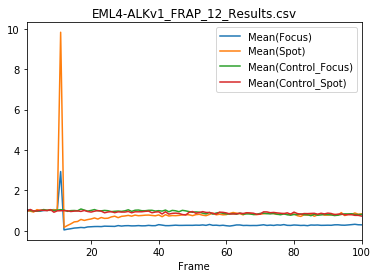

In [41]:
df_index = 2

df = df_list[df_index]
title = file_list[df_index]

sub = subtract_background(df)
norm = normalise(sub)

norm.plot(x='Frame');
plt.title(title);

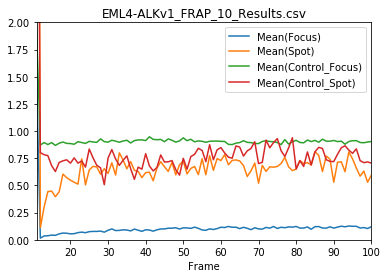

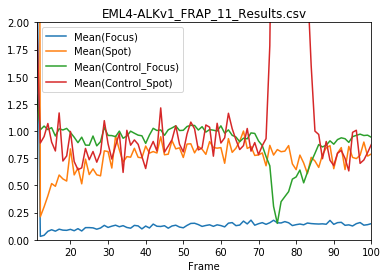

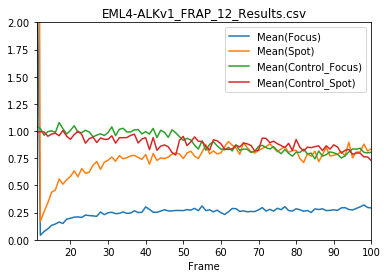

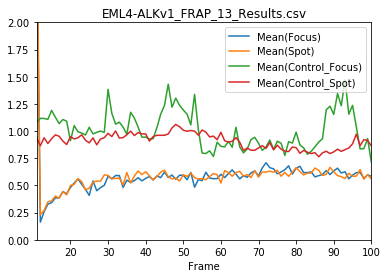

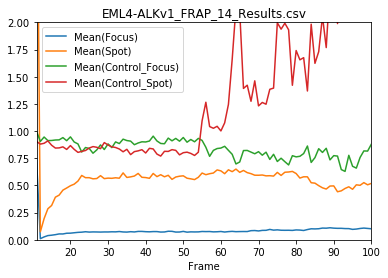

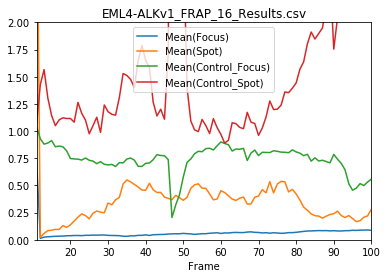

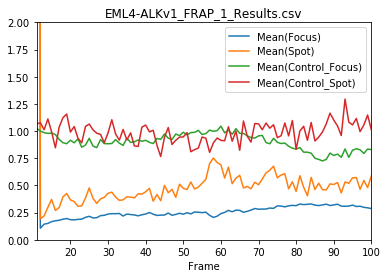

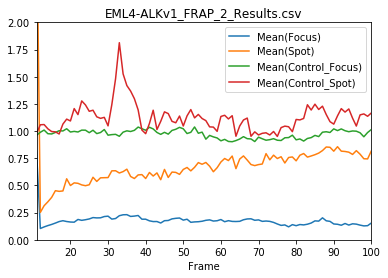

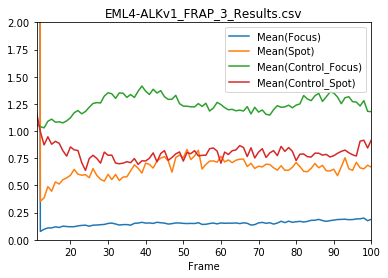

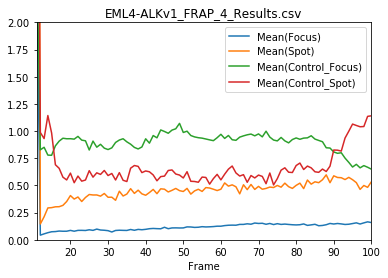

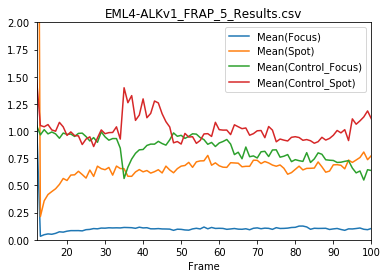

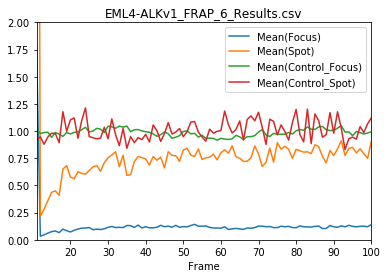

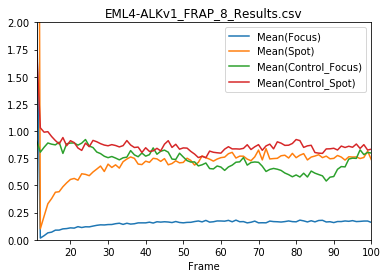

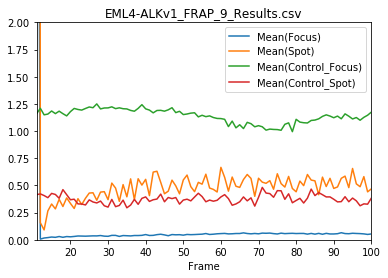

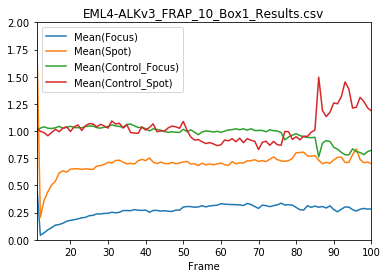

In [42]:
# Limit y to the recovery stage

for df_index in range(15):

    df    = df_list[df_index]
    title = file_list[df_index]
    t0    = t0_frames[df_index]

    sub = subtract_background(df)
    norm = normalise(sub)

    norm.plot(x='Frame');
    plt.title(title);
    plt.ylim(0,2);
    plt.xlim(t0-1, 100)

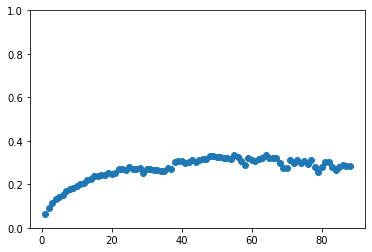

In [43]:
ROI = 'Mean(Focus)'

FRAP = norm[t0:].copy()
FRAP['Time'] = (FRAP['Frame']-t0)
plt.scatter(x=FRAP['Time'], y=FRAP[ROI]);
plt.ylim(0,1);

In [44]:
# Get plateau and mobile fraction
v = pd.DataFrame(FRAP.iloc[-10:,:].mean(axis=0)).T.reset_index(drop=True)

# Get F0
F0 = pd.DataFrame(FRAP.iloc[0,:]).T.reset_index(drop=True)

v.subtract(F0, axis=1)

# Mobile Fraction 
M = (v.subtract(F0)).divide(1-F0)
M

# IF THESE TRAITS ARE INTERESTING A FUNCTION CAN ADD THEM TO THE COMBINED_DF

,Mean(Focus),Mean(Spot),Mean(Control_Focus),Mean(Control_Spot),Frame,Time
0,0.232185,0.595681,5.90954,21.074263,-6.875,inf


In [45]:
def get_mobile_from_fit(y1):
    
    v  = y1.max()
    F0 = y1.min()
    M  = (v - F0)/(1-F0)
    
    return M

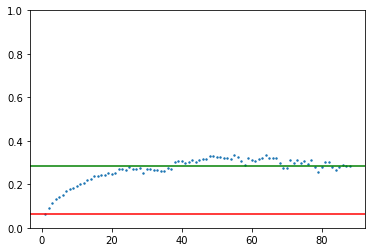

In [46]:
ROI = 'Mean(Focus)'

FRAP = norm[t0:].copy()
FRAP['Time'] = (FRAP['Frame']-t0)
plt.scatter(x=FRAP['Time'], y=FRAP[ROI], s=2);
plt.ylim(0,1);
plt.axhline(F0[ROI].values[0], c='r');
plt.axhline(v[ROI].values[0], c='g');

In [47]:
# Fit the curves

In [48]:
#Defaults
A = 0.4
B = 0.3
c = 0.1
d = 100
h = float(v[ROI])

In [49]:
h

0.2819858811563623

In [50]:
x = FRAP['Time']
y0 = FRAP[ROI]

In [51]:
def exp_curve(x, A, c, h):
    
    y = h - A*(np.exp(-x/c))
    
    return y

In [52]:
def exp_inv(y, A, c, h):
    
    #numpy.log   is the natural log. 
    #numpy.log10 is log10
    
#     y = h - A*(np.exp(-x/c))
#     y + A*(np.exp(-x/c)) =           h
#         A*(np.exp(-x/c)) =           h - y
#             np.exp(-x/c) =          (h - y)/A
#             np.exp(-x/c) =          (h - y)/A
#                    -x/c  =    np.ln((h - y)/A)
#                    -x    =  c*np.ln((h - y)/A)
    x1    = -c*np.log((h - y)/A)                
    
    return x1

In [53]:
def bi_exp_curve(x, A, B, c, d, h):
    
    y = h - A*(np.exp(-x/c))-B*(np.exp(-x/d))
    
    return y

In [54]:
def fit_exp(x, y0, p0, bounds):
    
    #ensure array-like structure
#     x = np.array(x)
#     y = np.array(y0)

    p , e = optimize.curve_fit(f = exp_curve, xdata=x, ydata=y0, p0=p0, bounds=bounds)

    A, c, h = p

    fit = exp_curve(x, A, c, h)

    return fit, p, e

In [55]:
# Fit bi exp
def fit_bi_exp(x, y0, p0, bounds):

    p , e = optimize.curve_fit(f = bi_exp_curve, xdata=x, ydata=y0, p0=p0, bounds=bounds)

    A, B, c, d, h = p

    fit = bi_exp_curve(x, A, B, c, d, h)
    
    return fit, p, e

In [56]:
# Compare fits
def compare_fits(x, y0):

    plt.scatter(x, y0);

    A= 0.7
    c= 0.6
    h= 0.24

    p0 = [A, c, h]
    bounds = (0.1, 0.1, 0), (1, 90, 1)

    y1, p1, e1 = fit_exp(x, y0, p0, bounds)

    plt.plot(x, y1);

    p0 = [A, B, c, d, h]
    bounds = (0.1, 0.01, 0, 0, 0.01), (1, 1, 100, 100, 1)

    y2, p2, e2 = fit_bi_exp(x, y0, p0, bounds)

    plt.plot(x, y2);
    
    return y1, p1, e1, y2, p2, e2

In [57]:
# Fit the curves

In [58]:
x = FRAP.Time
y = FRAP[ROI]

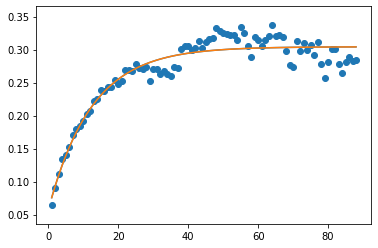

In [59]:
y1, p1, e1, y2, p2, e2 = compare_fits(x, y)
#Success!!

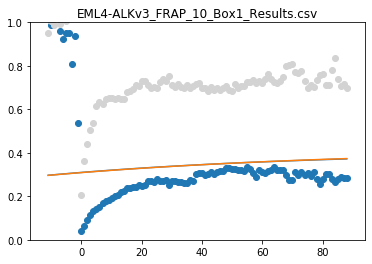

In [60]:
#What about when I change the df?
df_index = 14
df    = df_list[df_index]
title = file_list[df_index]
t0    = t0_frames[df_index]

sub = subtract_background(df)
norm = normalise(sub)
FRAP = get_FRAP(norm, t0)

x = FRAP.Time
y = FRAP[ROI]

y1, p1, e1, y2, p2, e2 = compare_fits(x, y)

plt.scatter(FRAP['Time'], FRAP['Mean(Spot)'], c='lightgrey')
plt.title(title);
plt.ylim(0,1);

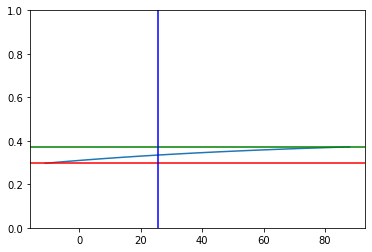

In [61]:
#Get thalf from fit

y1_range = y1.max()-y1.min()
y1_range

y1_half = y1.min()+y1_range/2

#what is x at y0_half?
A, c, h = p1
thalf = exp_inv(y1_half, A, c, h)
thalf

plt.plot(x, y1);
plt.axhline(y1.min(), c='r')
plt.axhline(y1.max(), c='g')
plt.axvline(thalf,    c='b')
plt.ylim(0,1);

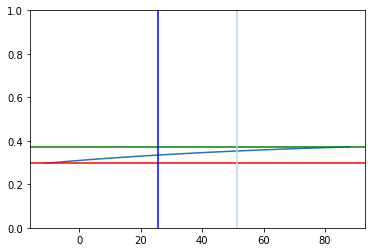

In [62]:
#What are the 2nd and 3rd half lives?
y1_range2 = y1.max()-y1_half
y1_range2

y1_half2 = y1_half+(y1_range2/2)
y1_half2

thalf2 = exp_inv(y1_half2, A, c, h)
thalf2

thalf2-thalf

plt.plot(x, y1);
plt.axhline(y1.min(), c='r')
plt.axhline(y1.max(), c='g')
plt.axvline(thalf,    c='b')
plt.axvline(thalf2,   c='lightblue')
plt.ylim(0,1);

In [125]:
# So let's compare FRAPs
FRAP_list = list()

for df_index in combined_df.index:
    
    df    = df_list[df_index]
    title = file_list[df_index]
    t0    = t0_frames[df_index]

    sub = subtract_background(df)
    norm = normalise(sub)
    FRAP = get_FRAP(norm, t0)
    
    #Set time as index to allow alignment
    FRAP.set_index(FRAP.Time, inplace=True)
    FRAP_curve = FRAP[ROI]
    
    #Propagate the experiment index
    FRAP_curve.name = df_index
    FRAP_list.append(FRAP_curve)
    
FRAP_df = pd.concat(FRAP_list, axis=1) 

In [126]:
FRAP_df

,0,1,2,3,4,5,6,7,8,9,...,76,77,78,79,80,81,82,83,84,85
Time,,,,,,,,,,,,,,,,,,,,,
-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,0.103559,0.139148,0.297322,0.596779,0.104599,0.090711,0.294144,0.129909,0.175462,0.165214,...,0.037776,0.350086,0.754405,0.474856,0.333134,0.469227,0.472138,0.543129,0.555626,0.907061
88,0.120826,0.148923,0.292571,0.584468,0.101396,0.086217,0.287263,0.154602,0.189124,0.158646,...,0.035384,0.444901,0.831862,NaN,NaN,0.526885,0.476296,0.467223,0.523675,0.900429
89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [127]:
#Remove rows containing NaNs
FRAP_df_trimmed = FRAP_df.dropna(axis=0)
FRAP_df_trimmed

,0,1,2,3,4,5,6,7,8,9,...,76,77,78,79,80,81,82,83,84,85
Time,,,,,,,,,,,,,,,,,,,,,
-8,1.011985,0.997095,0.983186,1.028252,1.013733,1.009984,1.008209,0.937744,0.993781,1.017481,...,0.945304,1.704708,1.016084,0.926522,0.838961,1.033455,1.016182,0.928127,0.996400,1.001543
-7,0.994965,1.020696,0.972519,0.946472,1.008607,0.998241,1.056124,0.991527,0.995361,1.045970,...,0.952255,0.838831,0.993595,0.954025,2.094665,1.024764,1.014004,1.087473,0.987316,0.988558
-6,0.995812,1.038241,1.001567,0.911868,0.974157,0.995279,0.987147,0.992879,1.028055,0.996506,...,0.886487,0.090701,1.041982,1.019402,0.846449,0.971951,0.999908,1.000671,0.991451,0.996513
-5,0.958814,1.040485,1.013285,0.991117,0.966685,0.979770,1.040756,1.001610,0.951036,0.992143,...,0.892638,0.047832,1.027352,1.031422,0.853522,0.976130,0.984557,0.946354,1.007489,0.988046
-4,0.972641,1.065680,1.028602,0.938218,0.894094,0.991071,1.073712,0.977571,0.952763,1.018182,...,0.784098,0.080883,0.979770,0.974668,0.878198,0.997650,0.974765,0.950607,1.045737,1.010523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,0.107403,0.143146,0.268382,0.636846,0.106771,0.084564,0.327558,0.174844,0.169630,0.138711,...,0.049787,0.032994,0.656920,0.397748,0.318803,0.517487,0.481524,0.484843,0.805662,0.906333
77,0.119158,0.178315,0.270629,0.599852,0.110642,0.081877,0.315343,0.169527,0.176211,0.150356,...,0.053908,0.027493,0.830489,0.455078,0.320993,0.490456,0.477903,0.485369,0.757265,0.908660
78,0.107566,0.142243,0.275738,0.634215,0.107132,0.083893,0.321047,0.145612,0.181177,0.145268,...,0.074076,0.026920,0.595939,0.460613,0.332477,0.462449,0.479923,0.503961,0.766569,0.914050


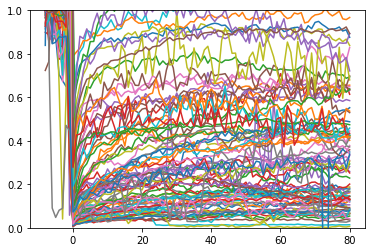

In [66]:
x = np.array(FRAP_df_trimmed.index)

for df_index in FRAP_df_trimmed.columns:
    
    y0 = np.array(FRAP_df_trimmed.loc[:,df_index])
    
    plt.plot(x, y0);
    plt.ylim(0,1);

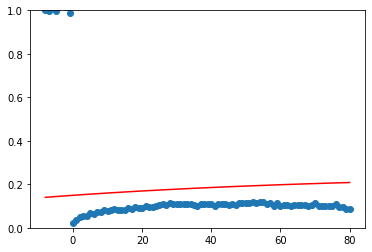

In [67]:
#Fit a chosen FRAP experiment
df_index=57
x = np.array(FRAP_df_trimmed.index)   
y0 = np.array(FRAP_df_trimmed.loc[:,df_index])

plt.scatter(x, y0);
plt.ylim(0,1);

A= 0.7
c= 0.6
h= 0.5

p0 = [A, c, h]
bounds = (0.1, 0.1, 0), (1, 90, 1)

y1, p1, e1 = fit_exp(x, y0, p0, bounds)

plt.plot(x, y1, c='r');


In [68]:
def get_thalf(x, y1):
    
    y1_range = y1.max()-y1.min()
    y1_range

    y1_half = y1.min()+y1_range/2

    #what is x at y0_half?
    A, c, h = p1
    thalf = exp_inv(y1_half, A, c, h)
    
    return thalf

In [69]:
# So let's compare Fits

fit_list   = list()
thalf_list = list()
M_list     = list()

#Initialize
A= 0.7
c= 0.6
h= 0.5

p0 = [A, c, h]
bounds = (0.1, 0.1, 0), (1, 90, 1)

for df_index in combined_df.index:
       
    x = np.array(FRAP_df_trimmed.index)   
    y0 = np.array(FRAP_df_trimmed.loc[:,df_index])

    y1, p1, e1 = fit_exp(x, y0, p0, bounds)
    
    thalf = get_thalf(x, y1)
    
    M = get_mobile_from_fit(y1)

    fit_list.append(y1)
    thalf_list.append(thalf)
    M_list.append(M)
    
# fit_list

In [70]:
fit_list[0]

array([0.14095591, 0.14216359, 0.14335792, 0.14453906, 0.14570714,
       0.14686232, 0.14800474, 0.14913453, 0.15025183, 0.15135679,
       0.15244955, 0.15353022, 0.15459896, 0.15565589, 0.15670114,
       0.15773483, 0.15875711, 0.15976809, 0.1607679 , 0.16175666,
       0.1627345 , 0.16370153, 0.16465788, 0.16560366, 0.16653899,
       0.16746398, 0.16837876, 0.16928342, 0.17017809, 0.17106288,
       0.17193788, 0.17280322, 0.173659  , 0.17450532, 0.17534229,
       0.17617001, 0.17698859, 0.17779812, 0.1785987 , 0.17939044,
       0.18017343, 0.18094777, 0.18171355, 0.18247088, 0.18321983,
       0.18396051, 0.184693  , 0.1854174 , 0.18613379, 0.18684227,
       0.18754292, 0.18823583, 0.18892109, 0.18959877, 0.19026896,
       0.19093175, 0.19158721, 0.19223543, 0.19287649, 0.19351047,
       0.19413744, 0.19475748, 0.19537067, 0.19597709, 0.1965768 ,
       0.19716989, 0.19775642, 0.19833648, 0.19891012, 0.19947743,
       0.20003846, 0.2005933 , 0.20114201, 0.20168465, 0.20222

In [71]:
combined_df['thalf']           = thalf_list
combined_df['Mobile_Fraction'] = M_list

In [72]:
combined_df.loc[:,['Protein', 'Fixed', 'thalf', 'Mobile_Fraction']]

,Protein,Fixed,thalf,Mobile_Fraction
0,ALKv1,False,25.647427,0.079373
1,ALKv1,False,25.647427,0.084178
2,ALKv1,False,25.647427,0.097273
3,ALKv1,False,25.647427,0.161589
4,ALKv1,False,25.647427,0.076875
...,...,...,...,...
81,Ret,False,25.647427,0.216312
82,Ret,False,25.647427,0.179873
83,Ret,False,25.647427,0.172845
84,Ret,False,25.647427,0.623854


In [73]:
# Flag some experiments for correction

combined_df['Corrections'] = 'No notes'

combined_df.loc[(combined_df['File']==19), 'Corrections'] = 'Puncta Moves'

combined_df.loc[(combined_df['Experiment']=='Exp003') 
                & (combined_df['Filename']=='EML4-ALKv1_FRAP_2_Results.csv'), 'Corrections'] = 'Really ALKv3'

combined_df.loc[(combined_df['Experiment']=='Exp003') 
                & (combined_df['Filename']=='EML4-ALKv3_FRAP_06_Results.csv'), 'Corrections'] = 'Same Cell as EML4-ALKv3_FRAP_01_Results.csv'

combined_df.loc[(combined_df['Experiment']=='Exp003') 
                & (combined_df['Filename']=='EML4-ALKv3_FRAP_01_Results.csv'), 'Corrections'] = 'Same Cell as EML4-ALKv3_FRAP_06_Results.csv'

combined_df.loc[31, 'Protein'] = 'ALKv3'

In [74]:
# Label Experiments as Puncta True/False
combined_df['Puncta']=True

combined_df.loc[(combined_df['File']==22), 'Puncta'] = False
combined_df.loc[(combined_df['File']==74), 'Puncta'] = False
combined_df.loc[(combined_df['File']==75), 'Puncta'] = False
combined_df.loc[(combined_df['File']==76), 'Puncta'] = True
combined_df.loc[(combined_df['File']==77), 'Puncta'] = True
combined_df.loc[(combined_df['File']==78), 'Puncta'] = False
combined_df.loc[(combined_df['File']==79), 'Puncta'] = True
combined_df.loc[(combined_df['File']==80), 'Puncta'] = True

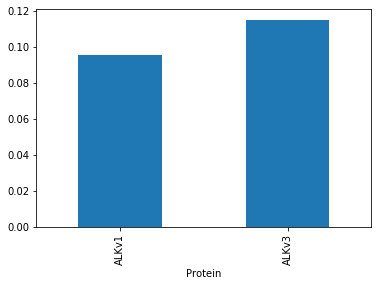

In [75]:
cleaned_df = combined_df[(combined_df.Puncta==True) & 
                         (combined_df.Fixed==False) & 
                         (combined_df.Protein != 'ALKv5') &
                         (combined_df.Protein != 'Ret')]

cleaned_df.groupby(by='Protein').mean().plot.bar(y='Mobile_Fraction', legend=None);

In [76]:
cleaned_df

,File,Fixed,Protein,Bleach Frame,Experiment,Filename,Initial_Focus,Initial_Spot,Initial_Control_Focus,Initial_Control_Spot,...,Final_Control_Spot,Final_Background,Initial_Target_Ratio,Initial_Control_Ratio,Initial_Target_Ratio_BGD_sub,Initial_Target_Diff_BGD_sub,thalf,Mobile_Fraction,Corrections,Puncta
0,0,False,ALKv1,12,Exp002,EML4-ALKv1_FRAP_10_Results.csv,267.144429,127.203571,400.106000,124.434571,...,122.1394,113.7314,2.100133,3.215393,11.344643,139.940857,25.647427,0.079373,No notes,True
1,1,False,ALKv1,12,Exp002,EML4-ALKv1_FRAP_11_Results.csv,189.503714,122.808286,205.458000,120.193286,...,119.1204,114.2656,1.543086,1.709397,8.756829,66.695429,25.647427,0.084178,No notes,True
2,2,False,ALKv1,12,Exp002,EML4-ALKv1_FRAP_12_Results.csv,241.954571,142.179286,209.415143,140.734000,...,134.8643,113.1130,1.701757,1.488021,4.460077,99.775286,25.647427,0.097273,No notes,True
3,3,False,ALKv1,12,Exp002,EML4-ALKv1_FRAP_13_Results.csv,164.263714,155.141429,239.760000,177.461286,...,169.7101,114.6555,1.058800,1.351055,1.224300,9.122286,25.647427,0.161589,No notes,True
4,4,False,ALKv1,12,Exp002,EML4-ALKv1_FRAP_14_Results.csv,1389.321286,216.406714,2070.260714,274.183714,...,586.5994,115.4462,6.419955,7.550633,12.582021,1172.914571,25.647427,0.076875,No notes,True
5,5,False,ALKv1,12,Exp002,EML4-ALKv1_FRAP_16_Results.csv,3821.516857,222.020429,753.751143,135.642143,...,198.4878,114.5995,17.212456,5.556910,34.597450,3599.496429,25.647427,0.075485,No notes,True
6,6,False,ALKv1,12,Exp002,EML4-ALKv1_FRAP_1_Results.csv,317.131143,130.972429,240.492000,124.025429,...,124.7618,114.0813,2.421358,1.939054,12.036392,186.158714,25.647427,0.198714,No notes,True
7,7,False,ALKv1,12,Exp002,EML4-ALKv1_FRAP_2_Results.csv,414.487429,163.597714,542.163429,143.269571,...,147.8730,113.5065,2.533577,3.784219,5.996552,250.889714,25.647427,0.085856,No notes,True
8,8,False,ALKv1,12,Exp002,EML4-ALKv1_FRAP_3_Results.csv,444.892571,140.257143,207.461000,136.815571,...,132.8607,113.6017,3.171978,1.516355,12.522448,304.635429,25.647427,0.127645,No notes,True
9,9,False,ALKv1,12,Exp002,EML4-ALKv1_FRAP_4_Results.csv,564.296000,151.804571,331.360714,145.720286,...,145.8810,114.5857,3.717253,2.273950,12.080182,412.491429,25.647427,0.082514,No notes,True


In [77]:
#If you have seaborn
import seaborn as sns

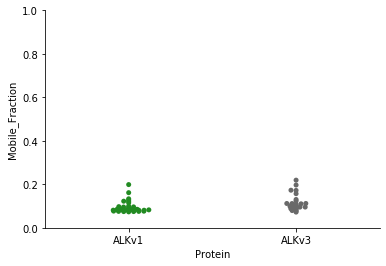

In [78]:
## Plot all ALKv1 and ALKv3 traces
colors = ["forestgreen", "dimgrey"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))

#sns.set(style='ticks', context='talk')

sns.swarmplot('Protein', 'Mobile_Fraction', data=cleaned_df)
sns.despine()
plt.ylim(0,1);

In [79]:
cleaned_df.groupby(by='Protein').mean().reset_index()

,Protein,File,Fixed,Bleach Frame,Initial_Focus,Initial_Spot,Initial_Control_Focus,Initial_Control_Spot,Initial_Background,t0_Focus,...,Final_Control_Focus,Final_Control_Spot,Final_Background,Initial_Target_Ratio,Initial_Control_Ratio,Initial_Target_Ratio_BGD_sub,Initial_Target_Diff_BGD_sub,thalf,Mobile_Fraction,Puncta
0,ALKv1,30.031250,False,12.062500,575.324594,206.280496,477.825196,172.104058,114.491545,142.416531,...,395.674916,175.186959,114.477525,3.089960,2.783128,11.185232,369.044098,25.647427,0.095462,True
1,ALKv3,43.538462,False,11.807692,1004.603220,366.286473,596.139171,288.986360,116.704192,195.769192,...,604.438396,261.520652,116.399588,2.860666,1.944680,6.169511,638.316747,25.647427,0.115300,True


In [80]:
cleaned_df.groupby(by='Protein').count()

,File,Fixed,Bleach Frame,Experiment,Filename,Initial_Focus,Initial_Spot,Initial_Control_Focus,Initial_Control_Spot,Initial_Background,...,Final_Control_Spot,Final_Background,Initial_Target_Ratio,Initial_Control_Ratio,Initial_Target_Ratio_BGD_sub,Initial_Target_Diff_BGD_sub,thalf,Mobile_Fraction,Corrections,Puncta
Protein,,,,,,,,,,,,,,,,,,,,,
ALKv1,32,32,32,32,32,32,32,32,32,32,...,32,32,32,32,32,32,32,32,32,32
ALKv3,26,26,26,26,26,26,26,25,25,26,...,25,26,26,25,26,26,26,26,26,26


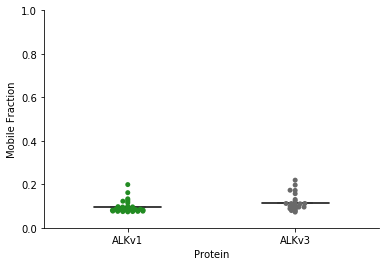

In [81]:
sns.boxplot('Protein', 'Mobile_Fraction', data=cleaned_df.groupby(by='Protein').mean().reset_index(), width=0.4)
sns.swarmplot('Protein', 'Mobile_Fraction', data=cleaned_df)
sns.despine()
plt.ylim(0,1);
plt.ylabel('Mobile Fraction');

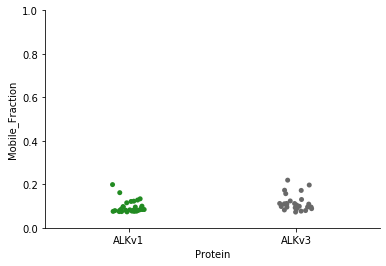

In [82]:
sns.stripplot('Protein', 'Mobile_Fraction', data=cleaned_df)
sns.despine()
plt.ylim(0,1);

In [83]:
## Plot all ALKv1 and ALKv3 traces

In [84]:
import seaborn as sns

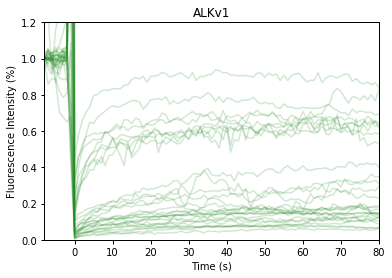

In [85]:
#Get the index of ALKv1 FRAPs
idx = np.where(cleaned_df.Protein == 'ALKv1')

for frap_experiment in np.nditer(idx):
    
    if (frap_experiment !=1 and frap_experiment !=5):
    
        FRAP = FRAP_df_trimmed[frap_experiment]

        FRAP.plot(c="forestgreen", alpha=0.2)

lwd = 1
        
# Edit axis widths
for axis in ['top','bottom','left','right']:
    plt.gca().spines[axis].set_linewidth(lwd)

plt.tick_params(width=lwd)

plt.title('ALKv1');
plt.xlabel('Time (s)');
plt.ylabel('Fluorescence Intensity (%)');
plt.ylim(0,1.2);

In [86]:
len(idx[0])

32

In [111]:
[idx in [-3,-2,-1] for idx in FRAP.index]

[False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False]

In [107]:
FRAP.iloc[-3:0]

Series([], Name: 57, dtype: float64)

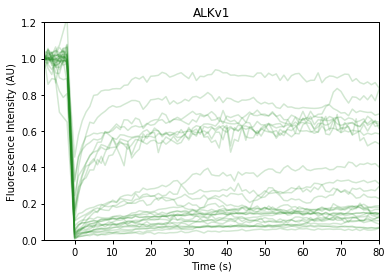

In [122]:
## ID errant traces
idx = np.where(cleaned_df.Protein == 'ALKv1')

for frap_experiment in np.nditer(idx):
    
    if (frap_experiment !=1 and 
        frap_experiment !=5 and 
        frap_experiment !=40):
    
        FRAP = FRAP_df_trimmed[frap_experiment].copy()
        FRAP.drop(index=-1, inplace=True)
        FRAP.plot(c="forestgreen", alpha=0.2)
        
        lwd = 1

        # Edit axis widths
        for axis in ['top','bottom','left','right']:
            plt.gca().spines[axis].set_linewidth(lwd)

        plt.tick_params(width=lwd)

        plt.title('ALKv1');
        plt.xlabel('Time (s)');
        plt.ylabel('Fluorescence Intensity (AU)');
        plt.ylim(0,1.2);

plt.savefig('Figures/ALKv1_80s.pdf', format='pdf')
plt.show()
#n=29

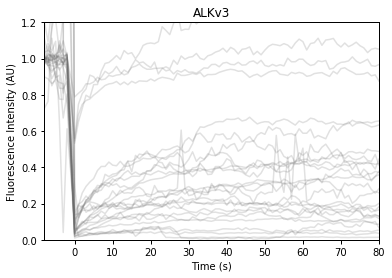

In [128]:
#Get the index of ALKv3 FRAPs
idx = np.where(cleaned_df.Protein == 'ALKv3')

for frap_experiment in np.nditer(idx):
    
    if (frap_experiment !=1 and 
        frap_experiment !=5):
    
        FRAP = FRAP_df_trimmed[frap_experiment].copy()
        FRAP.drop(index=-1, inplace=True)
        FRAP.plot(c="dimgrey", alpha=0.2)

lwd = 1
        
# Edit axis widths
for axis in ['top','bottom','left','right']:
    plt.gca().spines[axis].set_linewidth(lwd)

plt.tick_params(width=lwd)       
        
plt.title('ALKv3');
plt.xlabel('Time (s)');
plt.ylabel('Fluorescence Intensity (AU)');
plt.ylim(0,1.2);

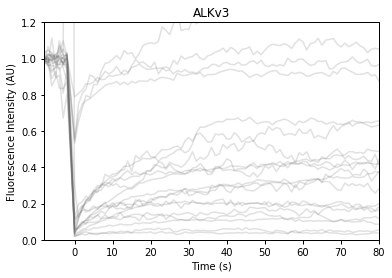

In [129]:
## ID errant traces
idx = np.where(cleaned_df.Protein == 'ALKv3')

for frap_experiment in np.nditer(idx):
    
    if (frap_experiment !=19 and 
        frap_experiment !=23 and 
        frap_experiment !=33 and 
        frap_experiment !=34 and 
        frap_experiment !=38 and
        frap_experiment !=55 
       ):
    
        FRAP = FRAP_df_trimmed[frap_experiment].copy()
        FRAP.drop(index=-1, inplace=True)
        FRAP.plot(c="dimgrey", alpha=0.2)
        
        lwd = 1

        # Edit axis widths
        for axis in ['top','bottom','left','right']:
            plt.gca().spines[axis].set_linewidth(lwd)

        plt.tick_params(width=lwd)

        plt.title('ALKv3');
        plt.xlabel('Time (s)');
        plt.ylabel('Fluorescence Intensity (AU)');
        plt.ylim(0,1.2);

plt.savefig('Figures/ALKv3_80s.pdf', format='pdf')
plt.show()
#n=20

In [90]:
idx[0]

array([14, 15, 16, 17, 18, 19, 20, 21, 23, 31, 32, 33, 34, 35, 36, 37, 38,
       49, 50, 51, 52, 53, 54, 55, 56, 57], dtype=int64)

In [91]:
len()

TypeError: len() takes exactly one argument (0 given)

In [ ]:
cleaned_df

In [ ]:
FRAP_df_trimmed

In [ ]:
combined_df.columns

In [ ]:
#Convert categories to numeric code
index, labels = combined_df.Protein.factorize()

colours=list()
for digit in index:
    colours.append('C'+str(digit))
# colours

#Plot t1/2 against different traits

combined_df.plot('Initial_Focus', 'thalf', kind='scatter', c=colours);
plt.gca().set_xscale('log');
plt.show()
# No clear trend with puncta brightness

combined_df.plot('Initial_Target_Ratio', 'thalf', kind='scatter', c=colours);
plt.gca().set_xscale('log');
plt.show()
# No clear trend with Initial_Target_Ratio

combined_df.plot('Initial_Focus', 'Mobile_Fraction', kind='scatter', c=colours);
plt.gca().set_xscale('log');
plt.ylim(0,1);
plt.show()
# No clear trend

combined_df.plot('Initial_Target_Ratio', 'Mobile_Fraction', kind='scatter', c=colours);
plt.gca().set_xscale('log');
plt.ylim(0,1);
# Perhaps some overlapping clustering here

combined_df.plot('Initial_Target_Ratio', 'Mobile_Fraction', kind='scatter', c=colours);
# plt.ylim(0,1);

In [ ]:
from math import pi

In [ ]:
def brightness_to_volume(brightness, A, c):
    
    B = brightness
    
    V = A * B + c
    
    return V

In [ ]:
def volume_to_sa(V):
    
    SA = (((3*V)/ (4*pi))**(2/3))*(4*pi)
    
    return SA

In [ ]:
V = np.arange(1, 20)

SA = volume_to_sa(V)

plt.plot(V, SA/V);

In [ ]:
# MF = Volume of Shell/ Volume of Sphere
def core_shell_model(V, thickness):
    
    #thickness as a percentage of R

    #Volume of sphere with radius R
    #V = (3/4) * pi * R **3
    
    #To get R from V
#     (V ** (1/3))              = (3/4) * pi * R
#     (V ** (1/3)) / pi         = (3/4) * R
#     (4/3) * (V ** (1/3)) / pi = R
    
    R = (4/3) * (V ** (1/3)) / pi
    
#     print('R is ', R)
    
    
    # get r from R and thickness
    r = R - thickness
    
#     print('r is ', r)

    #Volume of shell with width R-r
    V_shell = (4/3) * pi * (R **3 - r **3)
    
    #print('V_shell is ', V_shell)

    MF = V_shell / V
    
    return MF, V_shell

In [ ]:
thickness = 1.1
MF, V_shell = core_shell_model(V, thickness)

plt.plot(V, MF);
plt.ylim(0,1.2)

In [ ]:
def brightness_to_MF(brightness, *p):
    
    (A, c, t) = p
    
    V = brightness_to_volume(brightness, A, c)
    
    MF, V_shell = core_shell_model(V, t)
    
    return MF

In [ ]:
#Alternative unnested function
def brightness_to_MF(brightness, A, c, t):

    B         = brightness
    
    V = A * B + c
    #c is approximately the background

    R = (4/3) * (V ** (1/3)) / pi
    
    r = R - thickness
    
    V_shell = (4/3) * pi * (R **3 - r **3)

    MF = V_shell / V
    
    return MF

In [ ]:
# we should be able to fit this model to our data

A = 100
c = 0.001
brightness = np.arange(100, 1000)
thickness = 15

V = brightness_to_volume(brightness, A, c)

MF, V_shell = core_shell_model(V, thickness)

plt.plot(V, MF);
plt.ylim(0,1.2)


In [ ]:
brightness = np.log10(np.arange(100, 1000))
p0 = (2000, 0, -5000)

MF = brightness_to_MF(brightness, *p0)

plt.plot(brightness, MF);
#plt.ylim(0,1.2)

In [ ]:
## fit my curve to my data
from scipy import optimize

protein = 'ALKv1'
data = cleaned_df[cleaned_df.Protein.eq(protein)].copy()

#Data must be in ascending x
data.sort_values('Initial_Focus', inplace=True)

#Data must be arrays
x0 = np.log10(np.array(data['Initial_Focus']))
y0 = np.array(data['Mobile_Fraction'])

#     A,   c,     t
p0 = (100, 0.001, 20)

        #   lower     ,    upper
bounds = (0, -np.inf, 0), (5000, np.inf, 100)

plt.scatter(x0, y0);

popt, pcov = optimize.curve_fit(f=brightness_to_MF, xdata=x0, ydata=y0, p0=p0, bounds=bounds)

print(popt)

y1 = brightness_to_MF(x0, *popt)

plt.plot(x0, y1);
plt.ylim(0,1.2);


In [ ]:
#Alternative unnested function
def intensity_to_MF(I, A, t):
   
    V = A * I

    R = (4/3) * (V ** (1/3)) / pi
    
    r = R - thickness
    
    V_shell = (4/3) * pi * (R **3 - r **3)

    MF = V_shell / V
    
    return MF

In [ ]:
protein = 'ALKv1'
data = cleaned_df[cleaned_df.Protein.eq(protein)].copy()

#Data must be in ascending x
data.sort_values('Initial_Target_Diff_BGD_sub', inplace=True)

#Data must be arrays
np.array(data['Initial_Target_Diff_BGD_sub'])

In [ ]:
protein = 'ALKv1'
data = cleaned_df[cleaned_df.Protein.eq(protein)].copy()

#Data must be positive
data = data[data['Initial_Target_Diff_BGD_sub']>0]

#Data must be in ascending x
data.sort_values('Initial_Target_Diff_BGD_sub', inplace=True)

#Data must be arrays
x0 = np.log10(np.array(data['Initial_Target_Diff_BGD_sub']))
y0 = np.array(data['Mobile_Fraction'])

#     A,   t
p0 = (100, 80)

        #   lower     ,    upper
bounds = (0, 0), (5000, 500)

plt.scatter(x0, y0);

popt, pcov = optimize.curve_fit(f=intensity_to_MF, xdata=x0, ydata=y0, p0=p0, bounds=bounds)

print(popt)

y1 = intensity_to_MF(x0, *popt)

plt.plot(x0, y1);
plt.ylim(0,1.2);

In [ ]:
#Convert categories to numeric code
index, labels = combined_df.Protein.factorize()

colours=list()
for digit in index:
    colours.append('C'+str(digit))
# colours

#Plot t1/2 against different traits

combined_df.plot('Initial_Focus', 'thalf', kind='scatter', c=colours);
plt.show()
# No clear trend with puncta brightness

combined_df.plot('Initial_Target_Ratio', 'thalf', kind='scatter', c=colours);
plt.show()
# No clear trend with Initial_Target_Ratio

combined_df.plot('Initial_Focus', 'Mobile_Fraction', kind='scatter', c=colours);
plt.ylim(0,1);
plt.show()
# No clear trend

combined_df.plot('Initial_Target_Ratio', 'Mobile_Fraction', kind='scatter', c=colours);
plt.ylim(0,1);
plt.show()
# Perhaps some overlapping clustering here

combined_df.plot('Initial_Target_Ratio_BGD_sub', 'Mobile_Fraction', kind='scatter', c=colours);
plt.gca().set_xscale('log');
plt.ylim(0,1);
plt.show()

combined_df.plot('Initial_Target_Diff_BGD_sub', 'Mobile_Fraction', kind='scatter', c=colours);
plt.gca().set_xscale('log');
plt.ylim(0,1);
plt.show()

In [ ]:
index, labels = cleaned_df.Protein.factorize()

colours=list()
for digit in index:
    colours.append('C'+str(digit))

cleaned_df.plot('Initial_Target_Diff_BGD_sub', 'Mobile_Fraction', kind='scatter', c=colours);
plt.ylim(0,1);
plt.show()

cleaned_df.plot('Initial_Focus', 'Mobile_Fraction', kind='scatter', c=colours);
plt.gca().set_xscale('log');
plt.xlim(100,10000);
plt.ylim(0,1);
plt.show()

In [ ]:
## Same as above but tidier (exclude fixed, cytoplasmic, and ret)
cleaned_df = combined_df[(combined_df.Puncta==True) & (combined_df.Fixed==False) & (combined_df.Protein != 'Ret')]

index, labels = cleaned_df.Protein.factorize()

colours=list()
for digit in index:
    colours.append('C'+str(digit))

cleaned_df.plot('Initial_Focus', 'thalf', kind='scatter', c=colours);
plt.gca().set_xscale('log')

In [ ]:
## Same as above but tidier (exclude fixed, cytoplasmic, and ret)
cleaned_df = combined_df[(combined_df.Puncta==True) & (combined_df.Fixed==False) & (combined_df.Protein != 'Ret')]

index, labels = cleaned_df.Protein.factorize()

colours=list()
for digit in index:
    colours.append('C'+str(digit))

cleaned_df.plot('Initial_Target_Ratio', 'thalf', kind='scatter', c=colours);
plt.gca().set_xscale('log')

In [ ]:
## Same as above but tider (exclude fixed, cytoplasmic, and ret)
cleaned_df = combined_df[(combined_df.Puncta==True) & (combined_df.Fixed==False) & (combined_df.Protein != 'Ret')]

index, labels = cleaned_df.Protein.factorize()

colours=list()
for digit in index:
    colours.append('C'+str(digit))

cleaned_df.plot('Initial_Focus', 'Mobile_Fraction', kind='scatter', c=colours);
plt.ylim(0,1);
plt.gca().set_xscale('log');
# No clear trend with Initial_Focus

In [ ]:
## Same as above but tidier (exclude fixed, cytoplasmic, and ret)
cleaned_df = combined_df[(combined_df.Puncta==True) & (combined_df.Fixed==False) & (combined_df.Protein != 'Ret')]

index, labels = cleaned_df.Protein.factorize()

colours=list()
for digit in index:
    colours.append('C'+str(digit))

cleaned_df.plot('Initial_Target_Ratio', 'Mobile_Fraction', kind='scatter', c=colours);
# plt.gca().set_xscale('log');
plt.ylim(0,1);
# Weak negative correlation

In [ ]:
x = cleaned_df['Initial_Target_Ratio']
y = cleaned_df['Mobile_Fraction']

Pearson, p = stats.pearsonr(x, y)
Pearson, p

In [ ]:
#Best rank correlation
x = cleaned_df['Initial_Target_Ratio']
y = cleaned_df['Mobile_Fraction']

Spearman, p = stats.spearmanr(x, y)
Spearman, p

In [ ]:
x = cleaned_df['Initial_Focus']
y = cleaned_df['Mobile_Fraction']

Spearman, p = stats.spearmanr(x, y)
Spearman, p

In [ ]:
x = cleaned_df['Initial_Spot']
y = cleaned_df['Mobile_Fraction']

Spearman, p = stats.spearmanr(x, y)
Spearman, p

In [ ]:
## Tidier (exclude fixed, cytoplasmic, and ret)
cleaned_df = combined_df[(combined_df.Puncta==True) & (combined_df.Fixed==False) & (combined_df.Protein != 'Ret')]

index, labels = cleaned_df.Protein.factorize()

colours=list()
for digit in index:
    colours.append('C'+str(digit))

cleaned_df.plot('Initial_Spot', 'Mobile_Fraction', kind='scatter', c=colours);
plt.gca().set_xscale('log')
plt.ylim(0,1);

In [ ]:
# So let's compare FRAPs

In [ ]:
# How do our cells photobleach over time?

In [ ]:
for df in df_list:
    if 'Mean(Control_Spot)' in df.columns:
        plt.plot(df['Frame'], df['Mean(Control_Spot)']);

In [ ]:
for df in df_list:
    if 'Mean(Control_Spot)' in df.columns:
        
        #normalise_y
        y = (df['Mean(Control_Spot)']-df['Mean(Control_Spot)'].min())/(df.loc[0,'Mean(Control_Spot)']-df['Mean(Control_Spot)'].min())
        
        plt.plot(df['Frame'], y);

In [ ]:
# I checked file 73 manually, and the Control Focus moves into the Control Spot ROI.

In [ ]:
# Need to exclude this annomaly

for n, df in enumerate(df_list):
    if 'Mean(Control_Spot)' in df.columns:
        
        #normalise_y
        y = (df['Mean(Control_Spot)']-df['Mean(Control_Spot)'].min())/(df['Mean(Control_Spot)'].max()-df['Mean(Control_Spot)'].min())
        
        if y.max() > 200:
            print('File',n,'-', file_list[n], 'has a control_spot issue')
            
        if np.isnan(y[0]):
            print('File',n,'-', file_list[n], 'gives NaN')
            
        if 'inf' in y:
            print('File',n,'-', file_list[n], 'gives inf')
        
        plt.plot(df['Frame'], y);

In [ ]:
y_list=list()

for df in df_list:
    if 'Mean(Control_Spot)' in df.columns:
        
        #normalise_y
        y = (df['Mean(Control_Spot)']-df['Mean(Control_Spot)'].min())/(df.loc[0,'Mean(Control_Spot)']-df['Mean(Control_Spot)'].min())
        
        plt.plot(df['Frame'], y);
        plt.ylim(0,1);
        
        y_list.append(y)
        
    y_df = pd.DataFrame(y_list).T

In [ ]:
y_df

In [ ]:
#Plot groups of data

In [ ]:
for df_index in combined_df[combined_df['Protein']=='ALKv1'].index:
#     print(df_index)
    
    df    = df_list[df_index]
    title = file_list[df_index]
    t0    = t0_frames[df_index]

    sub = subtract_background(df)
    norm = normalise(sub)
    FRAP = get_FRAP(norm, t0)
    
    x  = FRAP['Time']
    y0 = FRAP['Mean(Focus)']
    A  = 0.7
    c  = 0.6
    h  = 0.24

    p0 = [A, c, h]
    bounds = (0.1, 0.1, 0), (1, 90, 1)
    
    fit, p, e = fit_exp(x, y0, p0, bounds)
    
    plt.scatter(FRAP['Time'], y0)
    plt.plot(FRAP['Time'], fit)
    plt.title('EML4-ALKv1 FRAP');

In [ ]:
#Check  fits
df_index = 14

title = combined_df.loc[df_index, 'Filename']

time  = FRAP_df_trimmed.index
frap  = FRAP_df_trimmed[df_index]
fit   = fit_list[df_index]
thalf = combined_df.loc[df_index, 'thalf']

plt.scatter(time, frap);
plt.plot(time, fit);
plt.axvline(thalf);
plt.title(title);
plt.ylim(0,1);

In [ ]:
FRAP_df.plot(legend=None);
plt.ylim(0,1);

In [ ]:
def get_FRAP_df(combined_df, protein, fix=False):

    FRAP_list = list()

    for df_index in combined_df[(combined_df['Protein']==protein) &
                               (combined_df['Fixed']==fix)].index:
    #     print(df_index)

        df    = df_list[df_index]
        title = file_list[df_index]
        t0    = t0_frames[df_index]

        sub = subtract_background(df)
        norm = normalise(sub)
        FRAP = get_FRAP(norm, t0)

        #Set time as index to allow alignment
        FRAP.set_index(FRAP.Time, inplace=True)
        FRAP_curve = FRAP[ROI]

        #Propagate the experiment title
        FRAP_curve.name = df_index
        FRAP_list.append(FRAP_curve)

    FRAP_df = pd.concat(FRAP_list, axis=1)
    
    FRAP_df.plot(legend=None);
    plt.title(protein)

    return FRAP_df


In [ ]:
fixed_ALKv1_FRAP_df = get_FRAP_df(combined_df, protein='ALKv1', fix=True)
plt.ylim(0,1);

In [ ]:
ALKv1_FRAP_df = get_FRAP_df(combined_df, protein='ALKv1')
plt.ylim(0,1);

In [ ]:
ALKv3_FRAP_df = get_FRAP_df(combined_df, protein='ALKv3')
plt.ylim(0,1);

In [ ]:
ALKv5_FRAP_df = get_FRAP_df(combined_df, protein='ALKv5')
plt.ylim(0,1);

In [ ]:
Ret_FRAP_df = get_FRAP_df(combined_df, protein='Ret')
plt.ylim(0,1);

In [ ]:
#Use a sequential colourmap

In [ ]:
## Colour by trait

In [ ]:
#get trait by filename
def get_trait_list(combined_df, FRAP_df, trait_name):
    ''''''

    trait_list=list()

    for df_index in FRAP_df.columns:

        trait=combined_df[combined_df['File']==df_index][trait_name].values[0]

        trait_list.append(trait)

    return trait_list

In [ ]:
trait_name = 'Initial_Focus'

trait_list = get_trait_list(combined_df, ALKv1_FRAP_df, trait_name)

trait_array = np.array(trait_list)

ALKv1_FRAP_df.iloc[:,trait_array.argsort()].plot(legend=None, c=trait_list, cmap="RdYlBu_r");
plt.title(trait_name);
plt.ylim(0,1);
#Bright foci tend to recover less well

In [ ]:
trait_name = 'Initial_Spot'

trait_list = get_trait_list(combined_df, ALKv1_FRAP_df, trait_name)

trait_array = np.array(trait_list)

trait_array.argsort()

ALKv1_FRAP_df.iloc[:,trait_array.argsort()].plot(legend=None, c=trait_list, cmap="RdYlBu_r");
plt.title(trait_name);
plt.ylim(0,1);
#Higher expression tends to recover better

In [ ]:
combined_df.columns

In [ ]:
trait_name = 'Initial_Target_Ratio'

trait_list = get_trait_list(combined_df, ALKv1_FRAP_df, trait_name)

trait_array = np.array(trait_list)

ALKv1_FRAP_df.iloc[:,trait_array.argsort()].plot(legend=None, c=trait_list, cmap="RdYlBu_r");
plt.title(trait_name);
plt.ylim(0,1);
#Experiments where the focus is bright relative to the surrounding cytoplasm, tend to recover less fully

#This is consistent with a lower supply of free protein, and a lower surface area to volume ratio of the puncta. 

In [ ]:
#What to the low, mid and high fractions look like?
trait_name = 'Initial_Target_Ratio'

trait_list = get_trait_list(combined_df, ALKv1_FRAP_df, trait_name)

trait_array = np.array(trait_list)

ALKv1_FRAP_df.iloc[:,trait_array.argsort()[:12]].plot(legend=None, c='b');
plt.title('Low');
plt.ylim(0,1);
plt.show()

ALKv1_FRAP_df.iloc[:,trait_array.argsort()[12:23]].plot(legend=None, c='y');
plt.title('Mid');
plt.ylim(0,1);
plt.show()

ALKv1_FRAP_df.iloc[:,trait_array.argsort()[23:]].plot(legend=None, c='r');
plt.title('High');
plt.ylim(0,1);
plt.show()

In [ ]:
#Check it is not related to experiment
group1 = list(combined_df[(combined_df.Experiment=='Exp002') & (combined_df.Fixed==False)].index)
group2 = list(combined_df[(combined_df.Experiment=='Exp003') & (combined_df.Fixed==False)].index)
group3 = list(combined_df[(combined_df.Experiment=='Exp004') & (combined_df.Fixed==False)].index)

ALKv1_FRAP_df.loc[:,group1].plot(legend=None, c='magenta');
plt.title('Exp002');
plt.ylim(0,1);
plt.show()

ALKv1_FRAP_df.loc[:,group2].plot(legend=None, c='cyan');
plt.title('Exp003');
plt.ylim(0,1);
plt.show()

ALKv1_FRAP_df.loc[:,group3].plot(legend=None, c='green');
plt.title('Exp004');
plt.ylim(0,1);
plt.show()

In [ ]:
## What about absolute recovery?

In [ ]:
df_index=7

df    = df_list[df_index]
title = file_list[df_index]
t0    = t0_frames[df_index]

sub = subtract_background(df)

#slice after t0 and subtract t0
real = sub[t0:].copy()

#add time in seconds
real['Time'] = (real['Frame']-t0)

#index by time
real.set_index(real.Time, inplace=True)

real = real.subtract(real.iloc[0,:])
real.drop(columns=['Frame', 'Time'], inplace=True)
    
real

In [ ]:
real.plot();

In [ ]:
protein = 'ALKv1'
fix = False

real_list = list()

for df_index in combined_df[(combined_df['Protein']==protein) &
                           (combined_df['Fixed']==fix)].index:
#     print(df_index)

    df    = df_list[df_index]
    title = file_list[df_index]
    t0    = t0_frames[df_index]

    sub = subtract_background(df)
  
    #slice after t0 and subtract t0
    real = sub[t0:].copy()

    #add time in seconds
    real['Time'] = (real['Frame']-t0)

    #index by time
    real.set_index(real.Time, inplace=True)

    real = real.subtract(real.iloc[0,:])
    real.drop(columns=['Frame', 'Time'], inplace=True)

    real_curve = real[ROI]

    #Propagate the experiment index
    real_curve.name = df_index
    real_list.append(real_curve)

real_df = pd.concat(real_list, axis=1)

real_df.plot(legend=None);
plt.title(protein + ' Absolute Recovery');

In [ ]:
trait_name = 'Initial_Focus'

trait_list = get_trait_list(combined_df, real_df, trait_name)

trait_array = np.array(trait_list)

real_df.iloc[:,trait_array.argsort()].plot(legend=None, c=trait_list, cmap="RdYlBu_r");
plt.title(trait_name);
#Brighter the initial puncta tend to have a greater absolute recovery

In [ ]:
trait_name = 'Initial_Spot'

trait_list = get_trait_list(combined_df, real_df, trait_name)

trait_array = np.array(trait_list)

real_df.iloc[:,trait_array.argsort()].plot(legend=None, c=trait_list, cmap="RdYlBu_r");
plt.title(trait_name);
#Brighter the initial cytoplasm tends to give a greater absolute recovery

In [ ]:
trait_name = 'Initial_Target_Ratio'

trait_list = get_trait_list(combined_df, real_df, trait_name)

trait_array = np.array(trait_list)

real_df.iloc[:,trait_array.argsort()].plot(legend=None, c=trait_list, cmap="RdYlBu_r");
plt.title(trait_name);
# Absolute recovery is less dependent upon Initial_Target_Ratio 
# foci closer to their surrounding in intensity (e.g. small foci) still tend to recover faster.

In [ ]:
#Let's look at the limiting cases?

In [ ]:
combined_df[(combined_df.Protein=='ALKv1') & (combined_df.Fixed==False)].sort_values('Initial_Target_Ratio')

In [ ]:
combined_df.groupby(by='Protein').mean().plot.bar(y='thalf', legend=None);
plt.title('FRAP Mean thalf');

In [ ]:
m   = cleaned_df.groupby(by='Protein')['Mobile_Fraction'].mean()
sd  = cleaned_df.groupby(by='Protein')['Mobile_Fraction'].std()

m.groupby(by='Protein').mean().plot.bar(y='Mobile_Fraction', yerr=sd);
plt.ylim(0,1);
plt.title('Mean thalf from 80s Puncta FRAP');
plt.ylabel('Mobile_Fraction');

In [ ]:
m   = cleaned_df.groupby(by='Protein')['Initial_Focus'].mean()
sd  = cleaned_df.groupby(by='Protein')['Initial_Focus'].std()

m.groupby(by='Protein').mean().plot.bar(y='Initial_Focus', yerr=sd);

In [ ]:
#The limiting cases are good enought to support this conclusion.

In [ ]:
#ALKv5

#22 -- Exp002 - EML4-ALKLv5_FRAP_1_Box1_z11 is just cytoplasm

#74 -- Exp004 - EML4-ALKLv5_FRAP_1 is cytoplasm
#75 -- Exp004 - EML4-ALKLv5_FRAP_2 is cytoplasm
combined_df.loc[(combined_df['File']==75), 'Corrections'] = 'same cell as EML4-ALKLv5_FRAP_3'
#76 -- Exp004 - EML4-ALKLv5_FRAP_3 is punctate (same cell as EML4-ALKLv5_FRAP_2)
combined_df.loc[(combined_df['File']==76), 'Corrections'] = 'same cell as EML4-ALKLv5_FRAP_2'
#77 -- Exp004 - EML4-ALKLv5_FRAP_4 is punctate
#78 -- Exp004 - EML4-ALKLv5_FRAP_5 is cytoplasm
#79 -- Exp004 - EML4-ALKLv5_FRAP_6 is punctate in a very dim cell
combined_df.loc[(combined_df['File']==79), 'Corrections'] = 'same cell as EML4-ALKLv5_FRAP_7'
#80 -- Exp004 - EML4-ALKLv5_FRAP_7 is punctate in a very dim cell (same cell as EML4-ALKLv5_FRAP_6)
combined_df.loc[(combined_df['File']==80), 'Corrections'] = 'same cell as EML4-ALKLv5_FRAP_6'
#!! -- Exp004 - EML4-ALKLv5_FRAP_8 is cytoplasm, but a dark spot enters the ROI (excluded from dataset )


In [ ]:
ALKv5_FRAP_df = get_FRAP_df(combined_df, protein='ALKv5')

labels=list()

for df_index in combined_df[(combined_df['Protein']=='ALKv5') &
                               (combined_df['Fixed']==False)].index:
    
    labels.append(str(combined_df.loc[df_index, 'Puncta']))

plt.ylim(0,1);
plt.legend(labels, loc='right');

In [ ]:
combined_df[combined_df.Protein=='ALKv5']

In [ ]:
#Ret in Exp002 do not recover
#Ret in Exp003 recover fast
#Ret in Exp004 recover fast

In [ ]:
trait_name = 'Initial_Target_Ratio'

trait_list = get_trait_list(combined_df, ALKv3_FRAP_df, trait_name)

trait_array = np.array(trait_list)

ALKv3_FRAP_df.iloc[:,trait_array.argsort()].plot(legend=None, c=trait_list, cmap="RdYlBu_r");
plt.title(trait_name);
plt.ylim(0,1);
#Experiments where the focus is bright relative to the surrounding cytoplasm, tend to recover less fully

#Less obvious for ALKv3 - predicting a less apparent core-shell structure

In [ ]:
trait_name = 'Initial_Target_Ratio'

trait_list = get_trait_list(combined_df, Ret_FRAP_df, trait_name)

trait_array = np.array(trait_list)

Ret_FRAP_df.iloc[:,trait_array.argsort()].plot(legend=None, c=trait_list, cmap="RdYlBu_r");
plt.title(trait_name);
plt.ylim(0,1);

In [ ]:
trait_name = 't0_Control_Focus'

trait_list = get_trait_list(combined_df, ALKv1_FRAP_df, trait_name)

ALKv1_FRAP_df.plot(legend=None, c=trait_list, cmap="RdYlBu_r");
plt.title(trait_name);

In [ ]:
trait_name = 't0_Control_Spot'

trait_list = get_trait_list(combined_df, ALKv1_FRAP_df, trait_name)

ALKv1_FRAP_df.plot(legend=None, c=np.array(trait_list), cmap="RdYlBu_r");
plt.title(trait_name);

In [ ]:
cm = plt.cm.get_cmap('RdYlBu_r')
xy = range(20)
z = xy
sc = plt.scatter(xy, xy, c=z, vmin=0, vmax=20, s=35, cmap=cm)
plt.colorbar(sc)
plt.show()


In [ ]:
trait_array = np.array(trait_list)

In [ ]:
print(trait_array.min(), trait_array.max())

In [ ]:
cm = plt.cm.get_cmap('RdYlBu')
sc = plt.plot(ALKv1_FRAP_df, c=trait_list, cmap=cm);
plt.colorbar(sc)
plt.show()

In [ ]:
cm = plt.cm.get_cmap('RdYlBu')
sc = ALKv1_FRAP_df.plot(legend=None, c=trait_list, vmin=100, vmax=4000, cmap=cm);
plt.colorbar(sc)
plt.show()

In [ ]:
## Plot mean recoveries

In [ ]:
ALKv1_FRAP_df.mean(axis=1).plot()
plt.ylim(0,1);

In [ ]:
ALKv3_FRAP_df.mean(axis=1).plot()
plt.ylim(0,1);

In [ ]:
ALKv5_FRAP_df.mean(axis=1).plot()
plt.ylim(0,1);

In [ ]:
Ret_FRAP_df.mean(axis=1).plot()
plt.ylim(0,1);

In [ ]:
fixed_ALKv1_FRAP_df.mean(axis=1).plot();
ALKv1_FRAP_df.mean(axis=1).plot();
ALKv3_FRAP_df.mean(axis=1).plot();
ALKv5_FRAP_df.mean(axis=1).plot();
Ret_FRAP_df.mean(axis=1).plot();
plt.legend(['fixed', 'v1', 'v3', 'v5', 'Ret']);

In [ ]:
file_list[36]

In [ ]:
t0_frames[36]

In [ ]:
df_index = 32

df    = df_list[df_index]
title = file_list[df_index]
t0    = t0_frames[df_index]

sub = subtract_background(df)
norm = normalise(sub)
FRAP = get_FRAP(norm, ROI, t0)

sub.plot(x='Frame');
plt.axvline(t0);
plt.xlim(t0-4, t0+4);

In [ ]:
#df 36 t0 is 11 not 10.

In [ ]:
#Aggregate Data from summary

FRAP_mean = pd.DataFrame()
FRAP_mean['Time']=range(100)

for df_index in combined_df[combined_df['Protein']=='ALKv1'].index:
#     print(df_index)
    
    df    = df_list[df_index]
    title = file_list[df_index]
    t0    = t0_frames[df_index]

    sub = subtract_background(df)
    norm = normalise(sub)
    FRAP = get_FRAP(norm, ROI, t0)
    FRAP.set_index(FRAP.Time, inplace=True)
    
#     FRAP_mean.merge(FRAP[ROI], how='outer', left_index=True, right_index=True)
    FRAP_mean.join(FRAP[ROI], how='outer')

FRAP_mean

In [ ]:
df_index = 12

df    = df_list[df_index]
title = file_list[df_index]
t0    = t0_frames[df_index]

sub = subtract_background(df)
norm = normalise(sub)
FRAP = get_FRAP(norm, ROI, t0)

#Index by Time
FRAP.set_index(FRAP.Time, inplace=True)
FRAP

In [ ]:
FRAP_mean.merge(FRAP, 'outer')
